In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
from scipy.stats import linregress


In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=057919fc104c58f1d67c793ae73d04ac


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | broome
Processing Record 5 of Set 1 | srednekolymsk
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | kruisfontein
Processing Record 8 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 9 of Set 1 | nyangao
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | provideniya
Processing Record 13 of Set 1 | saint george
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | watford
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | dodola
Processing Record 18 of Set 1 | northam
Processing Record 19 of Set 1 | san isidro
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | nabire
Processing Record 22 of Set 1 | nouadhibou
Processing Record 23 of Set 1 | carnarvon
Processing Record 24 

Processing Record 43 of Set 4 | pousat
City not found. Skipping...
Processing Record 44 of Set 4 | padang
Processing Record 45 of Set 4 | ahar
Processing Record 46 of Set 4 | cidreira
Processing Record 47 of Set 4 | taltal
Processing Record 48 of Set 4 | tautira
Processing Record 49 of Set 4 | lorengau
Processing Record 50 of Set 4 | beppu
Processing Record 1 of Set 5 | freetown
Processing Record 2 of Set 5 | poya
Processing Record 3 of Set 5 | charters towers
Processing Record 4 of Set 5 | krasnoselkup
Processing Record 5 of Set 5 | aklavik
Processing Record 6 of Set 5 | omboue
Processing Record 7 of Set 5 | diego de almagro
Processing Record 8 of Set 5 | aktash
Processing Record 9 of Set 5 | rock sound
Processing Record 10 of Set 5 | vilyuysk
Processing Record 11 of Set 5 | nhamunda
Processing Record 12 of Set 5 | margate
Processing Record 13 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 14 of Set 5 | quatre cocos
Processing Record 15 of Set 5 | arlit
Processing R

Processing Record 30 of Set 8 | tungawan
Processing Record 31 of Set 8 | saleaula
City not found. Skipping...
Processing Record 32 of Set 8 | talnakh
Processing Record 33 of Set 8 | luwuk
Processing Record 34 of Set 8 | umba
Processing Record 35 of Set 8 | christchurch
Processing Record 36 of Set 8 | castro
Processing Record 37 of Set 8 | saint-michel-des-saints
Processing Record 38 of Set 8 | dakar
Processing Record 39 of Set 8 | dwarka
Processing Record 40 of Set 8 | hamilton
Processing Record 41 of Set 8 | udachnyy
Processing Record 42 of Set 8 | bereda
Processing Record 43 of Set 8 | jasper
Processing Record 44 of Set 8 | beryslav
Processing Record 45 of Set 8 | imbituba
Processing Record 46 of Set 8 | clarence town
Processing Record 47 of Set 8 | georgetown
Processing Record 48 of Set 8 | flinders
Processing Record 49 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 50 of Set 8 | ishigaki
Processing Record 1 of Set 9 | bilibino
Processing Record 2 of Set 9 | h

Processing Record 16 of Set 12 | tumaco
Processing Record 17 of Set 12 | brae
Processing Record 18 of Set 12 | deputatskiy
Processing Record 19 of Set 12 | mareeba
Processing Record 20 of Set 12 | santiago del estero
Processing Record 21 of Set 12 | honningsvag
Processing Record 22 of Set 12 | vannes
Processing Record 23 of Set 12 | hualmay
Processing Record 24 of Set 12 | nanguneri
Processing Record 25 of Set 12 | groningen
Processing Record 26 of Set 12 | balurghat
Processing Record 27 of Set 12 | acajutla
Processing Record 28 of Set 12 | nizwa
Processing Record 29 of Set 12 | ust-omchug
Processing Record 30 of Set 12 | umm jarr
City not found. Skipping...
Processing Record 31 of Set 12 | chapayevka
Processing Record 32 of Set 12 | batken
Processing Record 33 of Set 12 | saint-francois
Processing Record 34 of Set 12 | luanshya
Processing Record 35 of Set 12 | machilipatnam
Processing Record 36 of Set 12 | hassleholm
Processing Record 37 of Set 12 | elko
Processing Record 38 of Set 12

In [9]:
len(cities)

608

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,44.96,66,1,5.91,RU,2021-05-31 02:19:20
1,Jamestown,42.0970,-79.2353,48.18,90,5,1.95,US,2021-05-31 02:19:20
2,Bluff,-46.6000,168.3333,49.80,88,100,20.47,NZ,2021-05-31 02:19:21
3,Broome,42.2506,-75.8330,47.91,96,90,1.01,US,2021-05-31 02:19:21
4,Srednekolymsk,67.4500,153.6833,66.13,25,96,11.45,RU,2021-05-31 02:19:21
5,Tuktoyaktuk,69.4541,-133.0374,44.60,53,20,8.05,CA,2021-05-31 02:19:22
6,Kruisfontein,-34.0033,24.7314,49.42,79,79,6.04,ZA,2021-05-31 02:19:22
7,Nyangao,-10.3333,39.2833,69.98,83,92,1.32,TZ,2021-05-31 02:19:23
8,Albany,42.6001,-73.9662,48.38,94,100,3.38,US,2021-05-31 02:17:27
9,Nikolskoye,59.7035,30.7861,39.78,69,87,2.84,RU,2021-05-31 02:19:23


In [11]:
# Reorder columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021-05-31 02:19:20,71.9167,114.0833,44.96,66,1,5.91
1,Jamestown,US,2021-05-31 02:19:20,42.0970,-79.2353,48.18,90,5,1.95
2,Bluff,NZ,2021-05-31 02:19:21,-46.6000,168.3333,49.80,88,100,20.47
3,Broome,US,2021-05-31 02:19:21,42.2506,-75.8330,47.91,96,90,1.01
4,Srednekolymsk,RU,2021-05-31 02:19:21,67.4500,153.6833,66.13,25,96,11.45
5,Tuktoyaktuk,CA,2021-05-31 02:19:22,69.4541,-133.0374,44.60,53,20,8.05
6,Kruisfontein,ZA,2021-05-31 02:19:22,-34.0033,24.7314,49.42,79,79,6.04
7,Nyangao,TZ,2021-05-31 02:19:23,-10.3333,39.2833,69.98,83,92,1.32
8,Albany,US,2021-05-31 02:17:27,42.6001,-73.9662,48.38,94,100,3.38
9,Nikolskoye,RU,2021-05-31 02:19:23,59.7035,30.7861,39.78,69,87,2.84


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

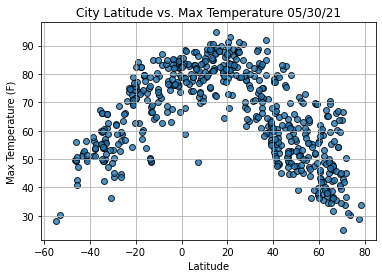

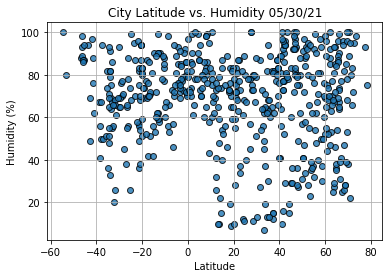

In [15]:
#Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

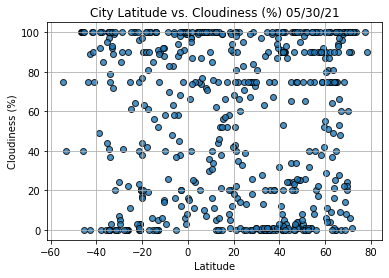

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

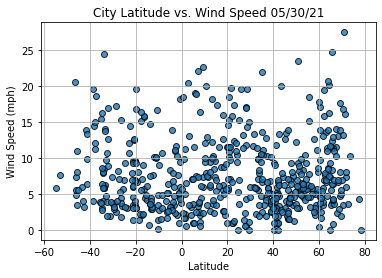

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f"R-squared: {r_value**2:.6f}")

In [19]:
# Create the Hemisphere DataFrames
index13 = city_data_df.loc[13]
index13

City                      Watford
Country                        GB
Date          2021-05-31 02:19:19
Lat                       51.6553
Lng                        -0.396
Max Temp                    50.68
Humidity                       93
Cloudiness                      0
Wind Speed                   5.53
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021-05-31 02:19:20,71.9167,114.0833,44.96,66,1,5.91
1,Jamestown,US,2021-05-31 02:19:20,42.0970,-79.2353,48.18,90,5,1.95
3,Broome,US,2021-05-31 02:19:21,42.2506,-75.8330,47.91,96,90,1.01
4,Srednekolymsk,RU,2021-05-31 02:19:21,67.4500,153.6833,66.13,25,96,11.45
5,Tuktoyaktuk,CA,2021-05-31 02:19:22,69.4541,-133.0374,44.60,53,20,8.05


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

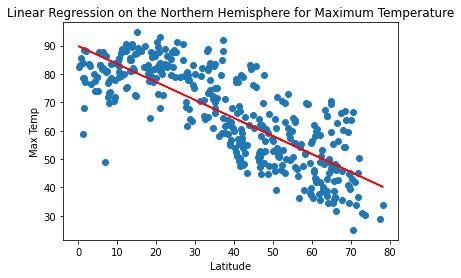

R-squared: 0.634243


In [22]:
# Linear regression on the Northern Hemisphere -- max temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature',
                       'Max Temp',(10,20))


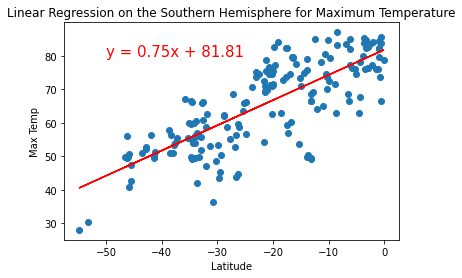

R-squared: 0.609495


In [23]:
# Linear regression on the Southern Hemisphere -- max temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                       'Max Temp',(-50,80))

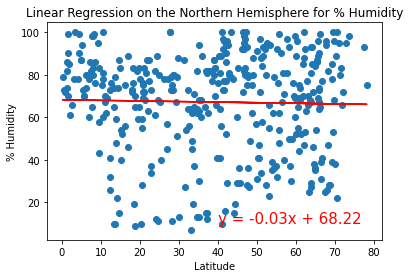

R-squared: 0.000578


In [24]:
# Linear regression on the Northern Hemisphere - humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(40,10))

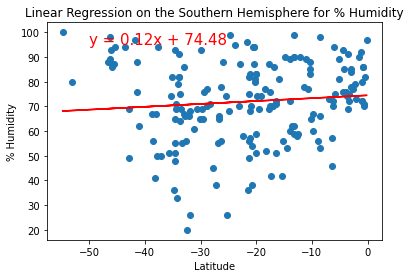

R-squared: 0.008747


In [25]:
# Linear regression on the Southern Hemisphere - humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,95))

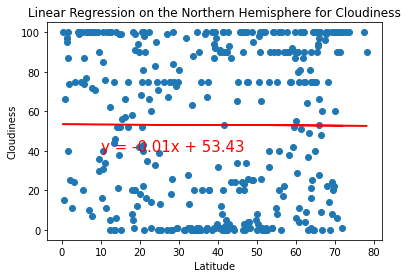

R-squared: 0.000023


In [26]:
# Linear regression on the northern Hemisphere -- Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudiness', 
                       'Cloudiness',(10,40))

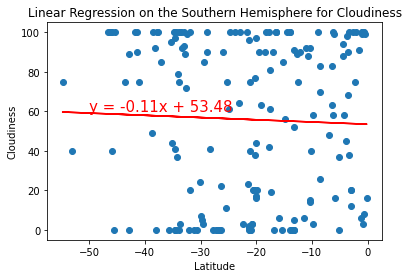

R-squared: 0.001394


In [27]:
# Linear regression on the Southern Hemisphere -- Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Cloudiness', 
                       'Cloudiness',(-50,60))

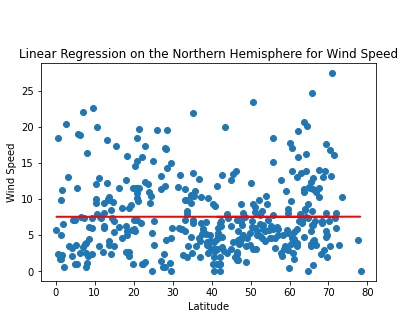

R-squared: 0.000000


In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

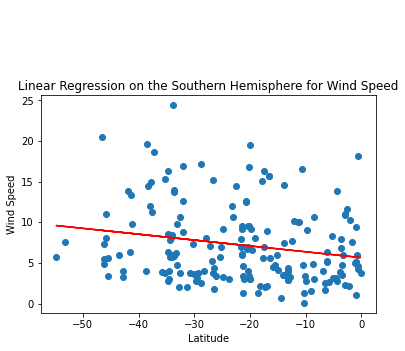

R-squared: 0.041048


In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))